# iLykei Lecture Series

# Advanced Machine Learning and Artificial Intelligence (MScA 32017)

# Project:  Generative Models

# Topic: Conditional Generative Adversarial Networks (CGANs)

## Notebook 2: Testing Conditional GAN (CGAN)


## Yuri Balasanov, &copy; iLykei 2019

##### Main texts: 

**[Generative Adversarial Networks, Ian J. Goodfellow, Jean Pouget-Abadie, Mehdi Mirza, Bing Xu, David Warde-Farley, Sherjil Ozair, Aaron Courville, Yoshua Bengio, arXiv:1406.2661 [stat.ML]](https://arxiv.org/abs/1406.2661)**

**[Conditional Generative Adversarial Nets, Mehdi Mirza, Simon Osindero, arXiv:1411.1784 [cs.LG]](https://arxiv.org/abs/1411.1784)**

**[How to Develop a Conditional GAN (cGAN) From Scratch, Jason Brownlee, 2019](https://machinelearningmastery.com/how-to-develop-a-conditional-generative-adversarial-network-from-scratch/)**    

This notebook demonstrates the conditional GAN model trained on Fashion MNIST data in the previous notebook.

Code in this notebook has been modified for the purposes of this project from [this blog by Jason Brownlee](https://machinelearningmastery.com/how-to-develop-a-conditional-generative-adversarial-network-from-scratch/).

In [1]:
import numpy as np
from numpy.random import randn
from numpy.random import randint
from keras.models import load_model
from matplotlib import pyplot as plt


Using TensorFlow backend.


# Data

Load and print the data.

In [2]:
#from keras.datasets import mnist, fashion_mnist
# load MNIST or FASHION_MNIST dataset
#(x_train, y_train), (_, _) = mnist.load_data()
#(x_train, y_train), (_, _) = fashion_mnist.load_data()

#np.save('x_train.npy',x_train)
#np.save('y_train.npy',y_train)
#np.save('x_train_fashion.npy',x_train)
#np.save('x_train_fashion.npy',y_train)
#x_train=np.load('x_train.npy')
#y_train=np.load('y_train.npy')
x_train=np.load('x_train_fashion.npy')
y_train=np.load('y_train_fashion.npy')

Create dictionary of the labels.

In [3]:
LabelData = {
    0: 'T-shirt',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'AnkleBoot'
}

Print first 60 images, add label data at x-axis.

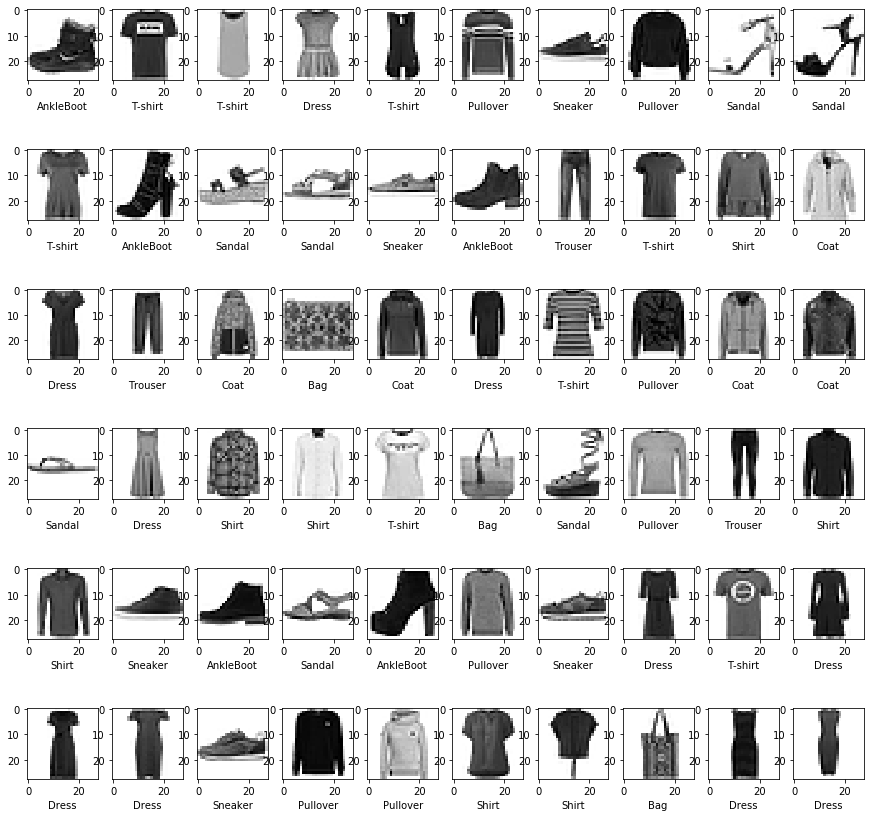

In [4]:
plt.figure(figsize=(15,15))
for i in range(60):
    plt.subplot(6, 10, 1 + i)
    plt.imshow(x_train[i], cmap='gray_r')
    plt.xlabel(LabelData[y_train[i]])
plt.show()

# Prepare the tools for demonstration

Create function generating `n_samples` random latent vectors of dimension `latent_dim` from standard normal distribution. These vectors are inputs to the generator.

In [5]:
def generate_latent_points(latent_dim, n_samples, n_classes=10):
    # generate Gaussian latent vectors
    x_input = randn(latent_dim * n_samples)
    # reshape into a batch of inputs for the network
    z_input = x_input.reshape(n_samples, latent_dim)
    # generate random labels of classes from 0 to n_classes
    labels = randint(0, n_classes, n_samples)
    return [z_input, labels]

Create function generating plots of generated objects from `examples` as $n$ by $n$ grid.

In [6]:
def make_plot(examples, n):
    plt.figure(figsize=(15,15))
    # plot images
    for i in range(n * n):
        # define subplot
        plt.subplot(n, n, 1 + i)
        # turn off axis
        plt.axis('off')
        # plot raw pixel data
        plt.imshow(examples[i, :, :, 0], cmap='gray_r')
    plt.show()

# Showing results

Load pre-trained CGAN model.

In [7]:
model = load_model('cgan_generator.h5')

W0721 14:19:46.171608 140399177758528 deprecation_wrapper.py:119] From /home/yuri/anaconda3/envs/newtf/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0721 14:19:46.197996 140399177758528 deprecation_wrapper.py:119] From /home/yuri/anaconda3/envs/newtf/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0721 14:19:46.343569 140399177758528 deprecation_wrapper.py:119] From /home/yuri/anaconda3/envs/newtf/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0721 14:19:46.344216 140399177758528 deprecation_wrapper.py:119] From /home/yuri/anaconda3/envs/newtf/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:181: The name tf.ConfigProto is deprecated. Pleas

Draw 100 latent vectors, each 100-length from normal distribution.

In [8]:
latent_points, labels = generate_latent_points(100, 100)

Generate 10 conditioning labels for each of 10 types of items

In [9]:
labels = np.asarray([x for _ in range(10) for x in range(10)])

Generate images, scale them from [-1,1] to [0,1] and plot them.

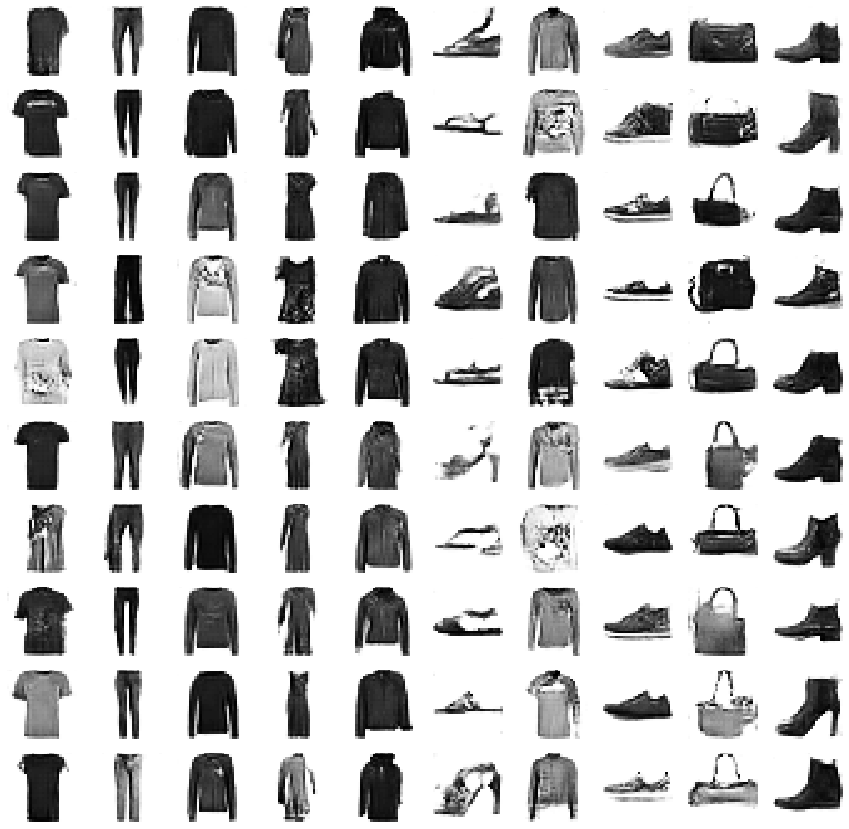

In [10]:
X  = model.predict([latent_points, labels])
X = (X + 1) / 2.0
make_plot(X, 10)